<a href="https://colab.research.google.com/github/usintec/3DBEFUnet/blob/master/3DBEFUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git clone https://github.com/usintec/3DBEFUnet.git
%cd 3DBEFUnet

# Install dependencies
!pip install -r requirements.txt


Cloning into '3DBEFUnet'...
remote: Enumerating objects: 353, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 353 (delta 111), reused 109 (delta 100), pack-reused 225 (from 1)
Receiving objects: 100% (353/353), 1.15 MiB | 3.94 MiB/s, done.
Resolving deltas: 100% (224/224), done.
/content/3DBEFUnet
Ignoring numpy: markers 'platform_system == "Windows"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 14.2 MB/s et

In [9]:
%cd 3DBEFUnet

/content/3DBEFUnet


In [10]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 277 bytes | 277.00 KiB/s, done.
From https://github.com/usintec/3DBEFUnet
   d1d77ae..9911921  master     -> origin/master
Updating d1d77ae..9911921
Fast-forward
 train.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!pip install -r requirements.txt --upgrade
import os, sys
os.kill(os.getpid(), 9)   # force restart so numpy reloads correctly


Ignoring numpy: markers 'platform_system == "Windows"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 121.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3

In [6]:
# =========================
# Setup Kaggle & Download BraTS2020 Dataset
# =========================

# Install required libraries
!pip install -q nibabel pydicom nilearn matplotlib opencv-python kaggle

import os
import zipfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import glob
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import random
import scipy.ndimage as ndimage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 80.9 MB/s eta 0:00:00


In [1]:
# =========================
# 1. Kaggle API Setup
# =========================
# Upload kaggle.json from your Kaggle account to Colab
from google.colab import files

print("Please upload your kaggle.json (from Kaggle > Account > Create API Token)")
files.upload()

# Move kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# =========================
# 2. Download BraTS2020 Dataset
# =========================
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation -p /content/

# Unzip dataset
!unzip -q /content/brats20-dataset-training-validation.zip -d /content/brats2020


Please upload your kaggle.json (from Kaggle > Account > Create API Token)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
 99% 4.11G/4.16G [01:16<00:03, 15.4MB/s]
100% 4.16G/4.16G [01:16<00:00, 58.5MB/s]


In [7]:
# Check dataset structure
!ls /content/brats2020

# =========================
# 3. Load & Explore MRI Data
# =========================
# Example: Load one subject
example_path = glob.glob("/content/brats2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/*.nii*")[0]
print("Example file:", example_path)

# Load NIfTI image using nibabel
img = nib.load(example_path)
img_data = img.get_fdata()

print("Image shape:", img_data.shape)  # typically (240, 240, 155)


BraTS2020_TrainingData	BraTS2020_ValidationData
Example file: /content/brats2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii
Image shape: (240, 240, 155)


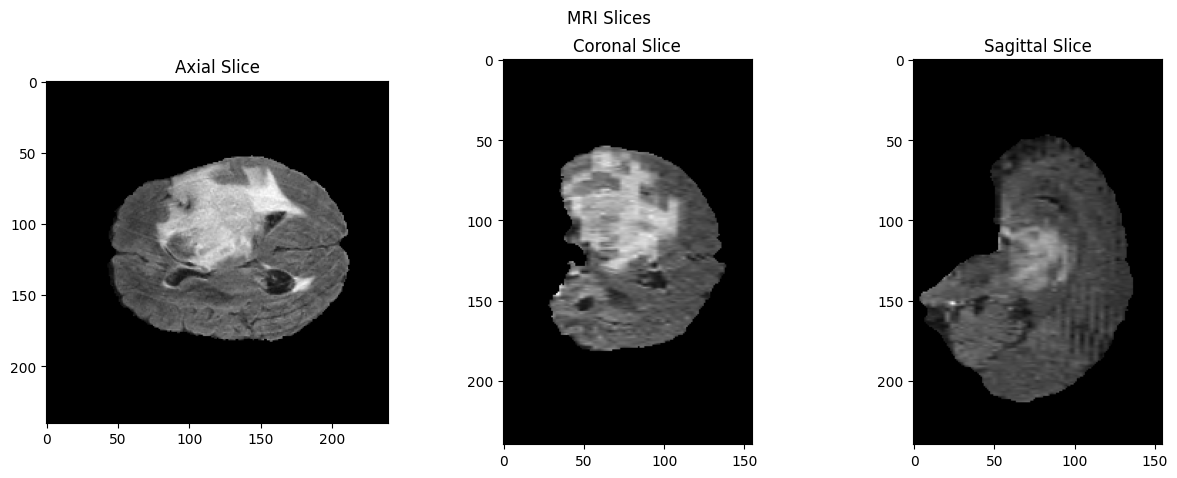

In [ ]:
# =========================
# 4. Visualize MRI slices
# =========================
def plot_slices(img_data, title="MRI Slices"):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_data[:, :, img_data.shape[2]//2], cmap="gray")
    axes[0].set_title("Axial Slice")
    axes[1].imshow(img_data[:, img_data.shape[1]//2, :], cmap="gray")
    axes[1].set_title("Coronal Slice")
    axes[2].imshow(img_data[img_data.shape[0]//2, :, :], cmap="gray")
    axes[2].set_title("Sagittal Slice")
    plt.suptitle(title)
    plt.show()

plot_slices(img_data)

In [ ]:
%cd 3DBEFUnet
!python test_inference.py

/content/3DBEFUnet
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Found total 369 cases.
Loaded 295 cases | Transform: True
Loaded 74 cases | Transform: False
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
{'layer0': 'cd', 'layer1': 'ad', 'layer2': 'rd', 'layer3': 'cv', 'layer4': 'cd', 'layer5': 'ad', 'layer6': 'rd', 'layer7': 'cv', 'layer8': 'cd', 'layer9': 'ad

In [12]:
#%cd 3DBEFUnet
!python train.py \
  --output_dir /content/drive/MyDrive/outputs

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
{'layer0': 'cd', 'layer1': 'ad', 'layer2': 'rd', 'layer3': 'cv', 'layer4': 'cd', 'layer5': 'ad', 'layer6': 'rd', 'layer7': 'cv', 'layer8': 'cd', 'layer9': 'ad', 'layer10': 'rd', 'layer11': 'cv', 'layer12': 'cd', 'layer13': 'ad', 'layer14': 'rd', 'layer15': 'cv'}
3D PiDiNet initialization done
✅ Loaded PiDiNet3D weights from /content/drive/MyDrive/outputs/BEFUnet3D/BEFUnet3D_pidinet_best.pth
Namespace(root_path='/content/brats2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData', test_path='/content/brats2020/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData', dataset='BraTS2020', list_dir='./lists/brats', num_classes=4, max_iterations=30000, max_epochs=250, batch_size=2, n_gpu=1, deterministic=1, base_lr